In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

In [2]:
dfin= pd.read_csv(r"SalaryData_Train(1).csv")
dfst= pd.read_csv(r"SalaryData_Test(1).csv")

In [3]:
dfst.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
dfin.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
df_tmp=dfst.append(dfin)

C:\Users\91832\AppData\Local\Temp\ipykernel_8644\2586981861.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tmp=dfst.append(dfin)


In [31]:
df_tmp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
test=dfst.copy()
train=dfin.copy()
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [14]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [16]:
num=LabelEncoder()
for i in str_c:
    train[i]=num.fit_transform(train[i])
    test[i]=num.fit_transform(test[i])    

In [17]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [18]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [19]:
mapi={'>50k':1,'<=50k':2}

In [20]:
train=train.replace({'Salary':mapi})
test=test.replace({'Salary':mapi})

In [21]:
df=train.append(test)

C:\Users\91832\AppData\Local\Temp\ipykernel_8644\204322198.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=train.append(test)


In [22]:
df1=df.copy()

In [23]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [24]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,75382.0,38.504086,13.184797,17.0,28.0,37.0,47.0,90.0
workclass,75382.0,2.202436,0.956454,0.0,2.0,2.0,2.0,6.0
education,75382.0,10.321376,3.815087,0.0,9.0,11.0,12.0,15.0
educationno,75382.0,10.119604,2.551744,1.0,9.0,10.0,13.0,16.0
maritalstatus,75382.0,2.583123,1.499475,0.0,2.0,2.0,4.0,6.0
occupation,75382.0,5.965681,4.027697,0.0,2.0,6.0,9.0,13.0
relationship,75382.0,1.414940,1.598883,0.0,0.0,1.0,3.0,5.0
race,75382.0,3.679605,0.833301,0.0,4.0,4.0,4.0,4.0
sex,75382.0,0.675320,0.468258,0.0,0.0,1.0,1.0,1.0
capitalgain,75382.0,1097.689422,7466.595575,0.0,0.0,0.0,0.0,99999.0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75382 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            75382 non-null  int64 
 1   workclass      75382 non-null  int32 
 2   education      75382 non-null  int32 
 3   educationno    75382 non-null  int64 
 4   maritalstatus  75382 non-null  int32 
 5   occupation     75382 non-null  int32 
 6   relationship   75382 non-null  int32 
 7   race           75382 non-null  int32 
 8   sex            75382 non-null  int32 
 9   capitalgain    75382 non-null  int64 
 10  capitalloss    75382 non-null  int64 
 11  hoursperweek   75382 non-null  int64 
 12  native         75382 non-null  int32 
 13  Salary         75382 non-null  object
dtypes: int32(8), int64(5), object(1)
memory usage: 6.3+ MB


### column of salary are object


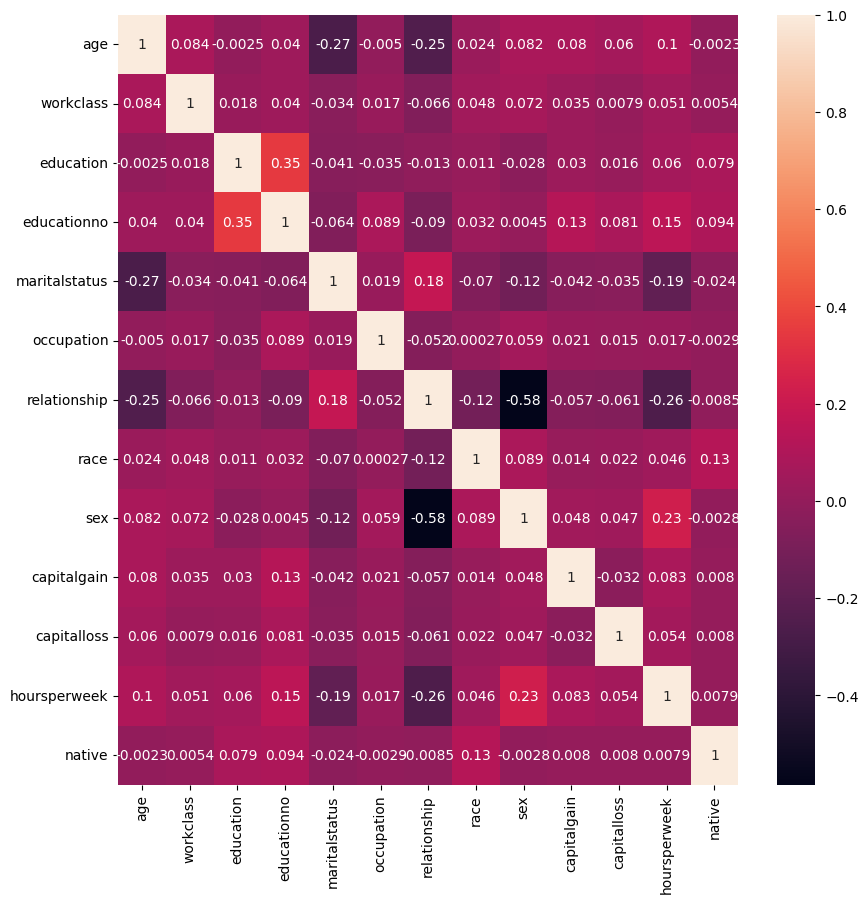

In [26]:
# checking correlation
corr=df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [32]:
dfa = df_tmp[df_tmp.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object').columns.tolist()

In [33]:
dfa = df_tmp[df_tmp.columns[0:13]]
obj_colum = dfa.select_dtypes(include='object').columns.tolist()

In [34]:
col=df1.columns
col

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [35]:
x_train=train[col[0:13]]
y_train=train[col[13]]
x_test=test[col[0:13]]
y_test=test[col[13]]

In [36]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [37]:
x_train=norm_func(x_train)
x_test=norm_func(x_test)

In [39]:
# L i n e a r

model_lin=SVC(kernel='linear')
model_lin.fit(x_train,y_train)
pred_lin=model_lin.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,pred_lin))

Accuracy: 0.8116583003471838


In [40]:
# P o l y
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_poly))

Accuracy: 0.8446297074368103


In [41]:
# R B F 
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_rbf))

Accuracy: 0.8440989805621282


In [42]:
# S i g m o i d
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)
pred_sig = model_sig.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_sig))

Accuracy: 0.573605183432476


# Poly model giving best accuracy

In [43]:
ytt=y_train.to_numpy()
pca=PCA(n_components=2)
x_train2=pca.fit_transform(x_train)
model_lin.fit(x_train2,ytt)

SVC(kernel='linear')